In [1]:
from sympy import *
from sympy import Rational as R
import numpy as np
from IPython.display import display, Latex, HTML, Math
init_printing()

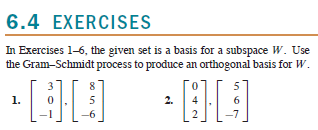

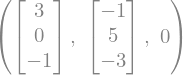

In [7]:
# 6.4.1
A = Matrix([[3, 8],
        [0, 5],
        [-1, -6]])


x1, x2 = A[:, 0], A[:, 1]

v1 = x1
v2 = x2 - x2.project(v1)

v1, v2, v1.dot(v2) # test

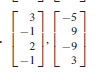

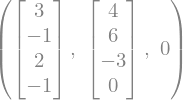

In [8]:
# 6.4.6
A = Matrix([[3, -5],
        [-1, 9],
        [2, -9],
        [-1, 3]])


x1, x2 = A[:, 0], A[:, 1]

v1 = x1
v2 = x2 - x2.project(v1)

v1, v2, v1.dot(v2) # test

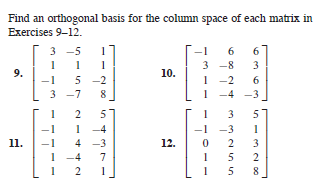

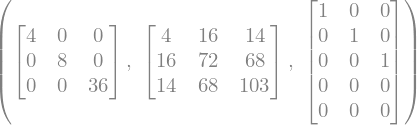

In [4]:
# 6.4.12

# Problem: Independent not orthogonal
A = Matrix([[1,3,5],[-1,-3,1],[0,2,3],[1,5,2],[1,5,8]])

u1 = A[:, 0]
u2 = A[:, 1] - (A[:, 1]).project(u1)
u3 = A[:, 2] - (A[:, 2]).project(u1) - (A[:, 2]).project(u2)

U = Matrix.hstack(u1, u2, u3)

U.T * U, A.T * A, A.rref()[0]

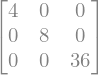

In [10]:
# Same but different
x1, x2, x3 = A[:, 0], A[:, 1], A[:, 2]

# Make orthogonal
u1 = x1
u2 = x2 - x2.project(u1)
u3 = x3 - x3.project(u1) - x3.project(u2)

# Orthogonal Matrix
U = Matrix.hstack(u1, u2, u3)

# Test
U.T * U


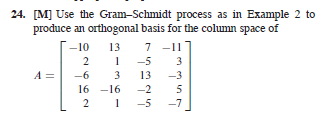

In [19]:
# 6.4.24
A = Matrix([[-10,13,7,-11],[2,1,-5,3],[-6,3,13,-3],[16,-16,-2,5],[2,1,-5,-7]])

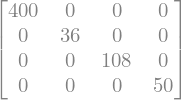

In [23]:
x1, x2, x3, x4 = A[:, 0], A[:, 1], A[:, 2], A[:,3]

# Make orthogonal
u1 = x1
u2 = x2 - x2.project(u1)
u3 = x3 - x3.project(u1) - x3.project(u2)
u4 = x4 - x4.project(u1) - x4.project(u2) - x4.project(u3)

# Orthogonal Matrix
U = Matrix.hstack(u1, u2, u3, u4)

# Test
U.T * U

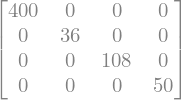

In [28]:
U = Matrix.hstack(*GramSchmidt([x1, x2, x3, x4]))
U.T * U

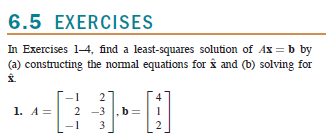

In [31]:
# 6.5.1
A = Matrix([[-1,2],[2,-3],[-1,3]])
b = Matrix([[4],[1],[2]])

Ata = A.T * A
Atb = A.T * b

Matrix.hstack(Ata, Atb).rref()[0][:, -1]

In [32]:
# Or

B = Ata**-1 * Atb
B

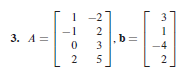

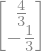

In [14]:
# 6.5.3
A = Matrix([[1,-2],[-1,2],[0,3],[2,5]])
b = Matrix([[3],[1],[-4],[2]])

Ata = A.T * A
Atb = A.T * b

Matrix.hstack(Ata, Atb).rref()[0][:, -1]

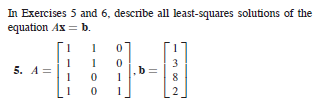

In [5]:
# 6.5.5
A = Matrix([[1,1,0],[1,1,0],[1,0,1],[1,0,1]])
b = Matrix([[1],[3],[8],[2]])

Ata = A.T * A
Atb = A.T * b

c = Matrix.hstack(Ata, Atb).rref()[0][:,-1]

x3 = Matrix.hstack(Ata, Atb).rref()[0][:, 0:-1].nullspace()[0]


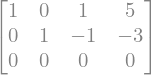

In [9]:
Matrix.hstack(Ata, Atb).rref()[0]

In [8]:
display(Latex("$$x = {} + x_3{}$$".format(latex(c), latex(x3))))

<IPython.core.display.Latex object>

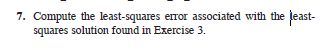

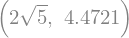

In [17]:
# 6.5.7
A = Matrix([[1,-2],[-1,2],[0,3],[2,5]])
b = Matrix([[3],[1],[-4],[2]])

xhat = Matrix.hstack(A.T * A, A.T * b).rref()[0][:,-1]

bhat = A*xhat

# Error
(b-bhat).norm(), round((b-bhat).norm(), 4)


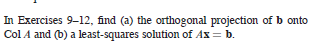

In [10]:
import numpy as np

def scalar_projection(u1, x):
    """
    Calculate the scalar projection of vector x onto vector u1.
    
    Args:
    u1 (array-like): The first vector.
    x (array-like): The second vector.
    
    Returns:
    float: The scalar projection of x onto u1.
    """
    # Calculate the scalar projection component
    scalar_projection = u1.dot(x) / u1.dot(u1) 
    
    return scalar_projection

In [ ]:
# 6.5.12
A=Matrix([[1,1,0],
          [1,0,-1],
          [0,1,1],
          [-1,1,-1]])
b=Matrix([[2],[5],[6],[6]])

a1 = scalar_projection(A[:, 0], b)
a2 = scalar_projection(A[:, 1], b)
a3 = scalar_projection(A[:, 2], b)

bhat = a1*A[:, 0] + a2*A[:, 1] + a3*A[:, 2]
bhat

In [12]:
display(Latex(r"$$\hat{{\mathbf{{b}}}} = {}{} + {}{} + {}{} = {}$$".format(a1, latex(A[:,0]), a2, latex(A[:,1]), a3, latex(A[:,2]), latex(bhat))))

<IPython.core.display.Latex object>

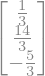

In [13]:
# 6.5.12
A=Matrix([[1,1,0],[1,0,-1],[0,1,1],[-1,1,-1]])
b=Matrix([[2],[5],[6],[6]])

a1 = b.project(A[:, 0])
a2 = b.project(A[:, 1])
a3 = b.project(A[:, 2])

p = a1 + a2 + a3

x = (A.T * A)**-1 * A.T * p
x

In [ ]:
display(Latex(r"$$\hat{{\mathbf{{b}}}} = {}{} + {}{} + {}{} = {}$$".format(a1, latex(A[:,0]), a2, latex(A[:,1]), a3, latex(A[:,2]), latex(bhat))))

<IPython.core.display.Latex object>

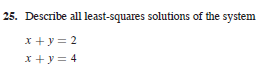

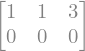

In [ ]:
# 6.5.25
A = Matrix([[1, 1], [1, 1]])
b = Matrix([2,4])

Matrix.hstack(A.T * A, A.T *b).rref()[0]


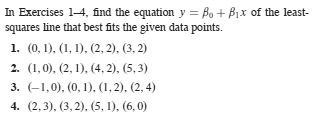

In [ ]:
# 6.6.3
x = [-1, 0, 1, 2]
y = [0, 1, 2, 4]

X = Matrix.hstack(ones(len(x), 1), Matrix(x))

y = Matrix(y)

XtX = X.T * X
Xty = X.T * y

B = Matrix.hstack(XtX, Xty).rref()[0][:,-1]

In [ ]:
display(Latex(r"$$\hat{{\mathbf{{y}}}} = {} + {}x$$".format(round(B[0], 2), round(B[1], 2))))

<IPython.core.display.Latex object>

In [ ]:
# 6.6.4
data = (2,3),(3,2),(5,1),(6,0)
x, y = map(list, zip(*data))

X = Matrix.hstack(ones(len(x), 1), Matrix(x))

y = Matrix(y)

XtX = X.T * X
Xty = X.T * y

B = Matrix.hstack(XtX, Xty).rref()[0][:,-1]

display(Latex(r"$$\hat{{\mathbf{{y}}}} = {} + {}x$$".format(round(B[0], 2), round(B[1], 2))))

<IPython.core.display.Latex object>

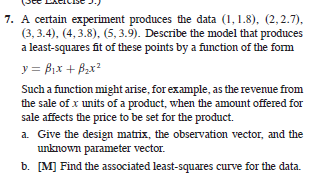

In [ ]:
# 6.6.7
x = [1, 2, 3, 4, 5]
y = [1.8, 2.7, 3.4, 3.8, 3.9]


X = Matrix.hstack(Matrix(x), Matrix(x).applyfunc(lambda xi: xi**2))

XtX = X.T * X
Xty = X.T * Matrix(y)

B = Matrix.hstack(XtX, Xty).rref()[0][:,-1]

display(Latex(r"$$\hat{{\mathbf{{y}}}} = {}x + {}x^2$$".format(round(B[0], 2), round(B[1], 2))))

<IPython.core.display.Latex object>

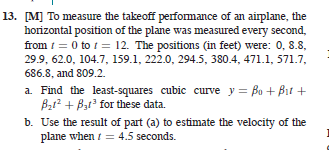

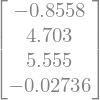

In [14]:
# 6.6.13
t = list(range(13))
y = [0,8.8, 29.9,62.0,104.7,159.1,222.0,294.5,380.4,471.1,571.7, 686.8, 809.2]

X = Matrix.hstack(ones(len(t), 1), Matrix(t), Matrix(t).applyfunc(lambda xi: xi**2),
                  Matrix(t).applyfunc(lambda xi: xi**3))
y = Matrix(y)

XtX = X.T * X
Xty = X.T * y

B = Matrix.hstack(XtX, Xty).rref()[0][:,-1]
B.evalf(4)

In [ ]:
display(Latex(r"$$y(t) = {} + {}t + {}t^2 {}t^3$$".format(round(B[0], 4), round(B[1], 4), round(B[2], 4), round(B[3], 4))))


<IPython.core.display.Latex object>

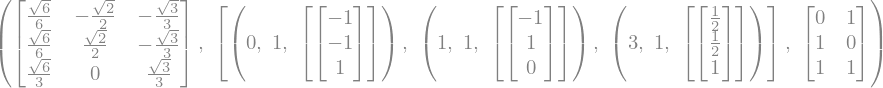

In [ ]:
A = Matrix([[0,1],[1,0],[1,1]])

vecs = (A * A.T).eigenvects()

# We get singular values
s1 = sqrt(vecs[2][0])
s2 = sqrt(vecs[1][0])
s3 = sqrt(vecs[0][0])

# We obtain all eigenvalues from AAT and construct U
u1 = vecs[2][2][0].normalized()
u2 = vecs[1][2][0].normalized()
u3 = vecs[0][2][0].normalized()
U = Matrix.hstack(u1, u2, u3)
U, vecs, A

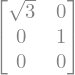

In [ ]:
# Let is construct S
S = diag(s1, s2, s3)
S = S[:, 0:-1]
S

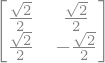

In [ ]:
v1 = (s1**-1) * u1.T * A
v2 = (s2**-1) * u2.T * A

Vt = v1.col_join(v2)

Vt

<IPython.core.display.Latex object>

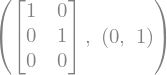

In [ ]:
display(Latex("$$A = {}{}{}$$".format(latex(U), latex(S), latex(Vt))))
(U*S*Vt).rref()